# Lab: Validation set and Cross-Validation
## CMSE 381 - Fall 2022
## Oct 3,  2022. Lecture 10



In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Validation set



The first thing we will do is try out the validation set approach. Dispite what our homework assignments would lead you to believe, we have some fabulous functions available in scikit learn that mean we really don't need to do all this work ourselves.


## Validation set on toy data

First off, let's generate some toy data just to mess around. 

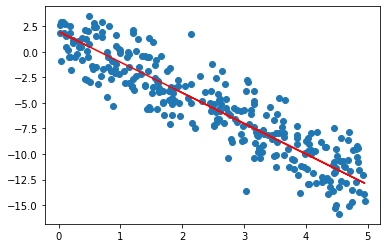

In [15]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m = -3, b = 2):
    return m*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

plt.scatter(X_toy,y_toy)
plt.plot(X_toy,f(X_toy),c = 'red')

Ok, so now we have our fake data set up.  Extracting training and testing sets is as simple as the following single line.  

In [16]:
from sklearn.model_selection import train_test_split
randomseed = 48824
X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, test_size=0.2, random_state=randomseed)

What this does is extracts two pairs of input/output variables $X$ and $y$.  The train we will use to train our models, and then we will test (or validate) them on the test data. 

One way to see what these sets are is to plot them, although usually we have much higher $p$ (a.k.a. way more input variables) so we can't really visualize like this normally. 

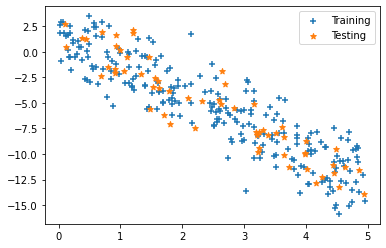

In [17]:
plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

&#9989; **<font color=red>Do this:</font>** Set up a linear regression model, train it on the training set, and test it on the test set.  What is your mean squared error? 

In [18]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)

predictions = model.predict(X_test.reshape(-1,1))

metrics.mean_squared_error(predictions, y_test)

2.942998227759328

Now that we can see what happens in one case, let's try doing this many times.  The code below generates a new train/test split. What happens to the MSE? 


3.529281332144893

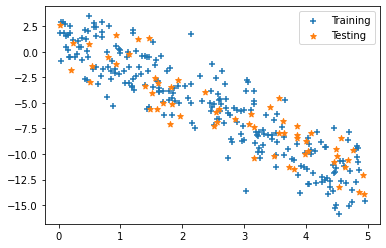

In [19]:
# Changing the random seed to get a new split of the data
randomseed +=1

X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, test_size=0.2, random_state=randomseed)
plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

model = LinearRegression()
model.fit(X_train.reshape(-1,1),y_train)
y_hat = model.predict(X_test.reshape(-1,1))

metrics.mean_squared_error(y_hat,y_test)


&#9989; **<font color=red>Do this:</font>**  Run the abve script in a loop, repeating $k=30$ times. Keep track of the MSE in a list and draw a histogram of the results. What do you notice? If you want to see more pattern, set $k$ to be something larger like 100.

(array([1., 6., 3., 3., 7., 4., 4., 1., 0., 1.]),
 array([2.73128127, 3.02665992, 3.32203858, 3.61741723, 3.91279588,
        4.20817454, 4.50355319, 4.79893185, 5.0943105 , 5.38968916,
        5.68506781]),
 <BarContainer object of 10 artists>)

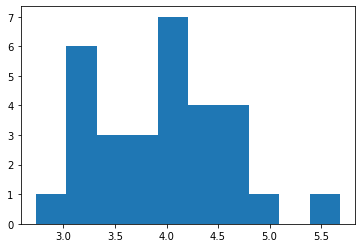

In [21]:
# Your code here
k = 0
MSEs = []
while k < 30:
    randomseed +=1

    X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, test_size=0.2, random_state=randomseed)
    #plt.scatter(X_train,y_train, marker = '+', label = "Training")
    #plt.scatter(X_test,y_test, marker = '*', label = "Testing")
    #plt.legend()

    model = LinearRegression()
    model.fit(X_train.reshape(-1,1),y_train)
    y_hat = model.predict(X_test.reshape(-1,1))

    mse = metrics.mean_squared_error(y_hat,y_test)
    MSEs.append(mse)
    k+=1

plt.hist(MSEs)

(array([ 2.,  5., 12., 23., 21., 15., 11.,  4.,  4.,  3.]),
 array([2.45727193, 2.77364117, 3.09001041, 3.40637965, 3.72274889,
        4.03911813, 4.35548737, 4.67185661, 4.98822585, 5.30459509,
        5.62096433]),
 <BarContainer object of 10 artists>)

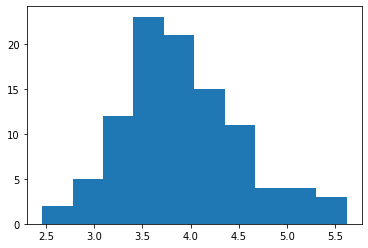

In [22]:
k = 0
MSEs = []
while k < 100:
    randomseed +=1

    X_train, X_test, y_train, y_test = train_test_split(X_toy,y_toy, test_size=0.2, random_state=randomseed)
    #plt.scatter(X_train,y_train, marker = '+', label = "Training")
    #plt.scatter(X_test,y_test, marker = '*', label = "Testing")
    #plt.legend()

    model = LinearRegression()
    model.fit(X_train.reshape(-1,1),y_train)
    y_hat = model.predict(X_test.reshape(-1,1))

    mse = metrics.mean_squared_error(y_hat,y_test)
    MSEs.append(mse)
    k+=1

plt.hist(MSEs)


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 2. Leave One Out Cross Validation (LOOCV)

Luckily, `sklearn` has a simple built in procedure to extract your LOOCV splits for easily passing to your models. However, these work a bit differently than before. As always, the `sklearn` documentation and user guide is an excellent place to start. 

- [LOOCV Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)
- [LOOCV User guide](https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out)

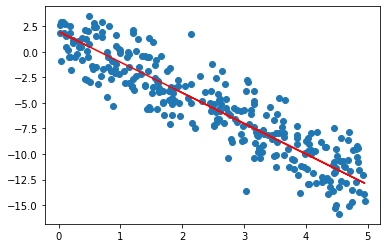

In [23]:
# I'm copying the same code from above just so we're restarting with the same data. 


# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m = -3, b = 2):
    return m*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

plt.scatter(X_toy,y_toy)
plt.plot(X_toy,f(X_toy),c = 'red')

In [24]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X_toy)

# Notice that trying to print loo doesn't give us much that's useful
print(loo)

LeaveOneOut()


In [25]:
# The power of the function shows up when we use it in a for loop:
for train_index, test_index in loo.split(X_toy):
    print("TRAIN:", train_index, "TEST:", test_index)
    

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

 289 290 291 292 293 294 295 296 297 298 299] TEST: [124]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

 289 290 291 292 293 294 295 296 297 298 299] TEST: [270]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

&#9989; **<font color=red>Question:</font>** What's the difference between the `LOO.split` output and the `train_test_split` from before?

every training is just leaving out 1 value, and then using that where as the train_test_split took a ration of values and to average just those.

The code below fixes the problem, and draws a figure like above where we get to see which data point is part of the testing set. 

[4.75357153 3.65996971 2.99329242 0.7800932  0.7799726  0.29041806
 4.33088073 3.00557506 3.54036289 0.10292247 4.84954926 4.1622132
 1.06169555 0.90912484 0.91702255 1.52121121 2.62378216 2.15972509
 1.4561457  3.05926447 0.6974693  1.46072324 1.83180922 2.28034992
 3.92587981 0.99836891 2.57117219 2.96207284 0.23225206 3.03772426
 0.85262062 0.32525796 4.74442769 4.82816017 4.04198674 1.52306885
 0.48836057 3.42116513 2.20076247 0.61019117 2.47588455 0.17194261
 4.54660201 1.29389991 3.31261142 1.55855538 2.60034011 2.7335514
 0.92427228 4.84792314 3.87566412 4.69749471 4.47413675 2.98949989
 4.60937118 0.44246251 0.97991431 0.22613644 1.62665165 1.94338645
 1.35674516 4.14368755 1.78376663 1.40467255 2.71348042 0.70462112
 4.0109849  0.37275322 4.93443468 3.86122385 0.99357841 0.02761059
 4.07730714 3.53428672 3.64503584 3.85635173 0.37022326 1.79232864
 0.5793453  4.31551713 3.11649063 1.65449012 0.31779175 1.55491161
 1.62591661 3.64803089 3.18778736 4.43606371 2.36107463 0.597971

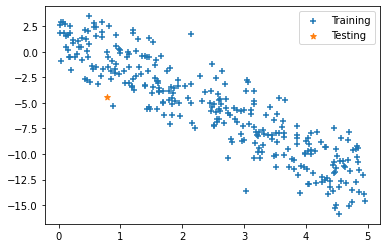

In [28]:
# These generator objects are a bit weird, so I can't just pull one split
# out of the list. The code below is a bit convoluted, but essentially I'm 
# just trying to draw the last train/test split found. 
countPrint = 0
maxPrint = 5 # If you change this number, a different point will be labeled as 
             # the testing point.

for train_index, test_index in loo.split(X_toy):

    countPrint +=1 

    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_tr/ain, y_test = y_toy[train_index], y_toy[test_index]
    
    # Uncomment if you want to see how this fixes it
    print(X_train,y_train)
    print(X_test, y_test)
    print('\n')

    if countPrint >= maxPrint:
        break

plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

&#9989; **<font color=red>Do this:</font>** Use the leave one out splits to perform a linear regression on each one, return the mean squared error, and then average over all the values to get the LOOCV error estimation.

What do you notice about this error estimation vs. the validation set version above? 


In [32]:
# Your code here #
MSEs = []
for train_index, test_index in loo.split(X_toy):
    
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]
    
    model = LinearRegression()
    model.fit(X_train.reshape(-1,1),y_train)
    y_hat = model.predict(X_test.reshape(-1,1))

    mse = metrics.mean_squared_error(y_hat,y_test)
    MSEs.append(mse)
    
print(np.mean(MSEs))

3.9363320871698524




-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.